In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import pandas as pd
import numpy as np
from utilities import *
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

In [47]:
X_train, y_train, X_test, y_test = load_data()

In [48]:
num_of_nulls = X_train.isna().sum()
percentage_of_nulls = num_of_nulls/X_train.shape[0]
percentage_of_nulls.sort_values(ascending=False, inplace=True)
percentage_of_nulls.apply(lambda x: f"{x*100:.3f}%").head(10)

PoolQC         99.521%
MiscFeature    96.301%
Alley          93.767%
Fence          80.753%
MasVnrType     59.726%
FireplaceQu    47.260%
LotFrontage    17.740%
GarageCond      5.548%
GarageType      5.548%
GarageYrBlt     5.548%
dtype: object

In [49]:
X_train, removed_columns = remove_null_columns(X_train, 0.4)
removed_columns

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

Removed columns with high correlation: Index([], dtype='object')
Removed columns with low correlation to target: Index(['Id', 'MiscVal', 'MoSold', 'YrSold', 'BsmtFinSF2', 'LowQualFinSF',
       'BsmtHalfBath', '3SsnPorch'],
      dtype='object')


<Axes: >

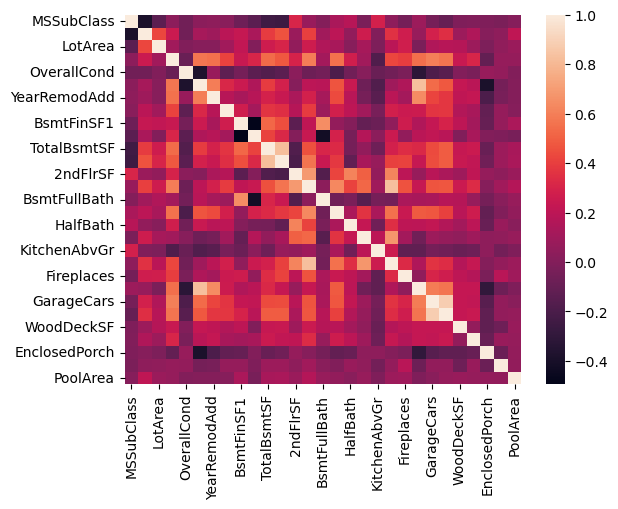

In [50]:
min_max = MinMaxScaler()

numerical_variables = X_train.select_dtypes(exclude=object)
numerical_variables_normalized = pd.DataFrame(min_max.fit_transform(numerical_variables), columns=numerical_variables.columns)
numerical_variables, removed_columns = remove_high_correlation_columns(numerical_variables)
X_train = X_train.drop(removed_columns, axis = 1)
print(f"Removed columns with high correlation: {removed_columns}")
numerical_variables, removed_columns = remove_low_correlation_to_target_columns(numerical_variables, y_train)
print(f"Removed columns with low correlation to target: {removed_columns}")
X_train = X_train.drop(removed_columns, axis = 1)
sns.heatmap(numerical_variables.corr())

<Axes: >

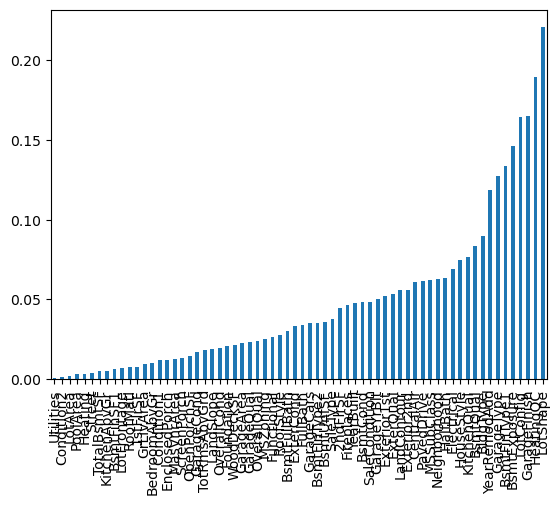

In [51]:
min_max = MinMaxScaler()
ordinal_encoder = OrdinalEncoder()

categorical_variables = X_train.select_dtypes(include=object)
X_train[categorical_variables.columns] = ordinal_encoder.fit_transform(categorical_variables)
X_train = pd.DataFrame(min_max.fit_transform(X_train), columns=min_max.get_feature_names_out())
variance = X_train.var()
variance.sort_values().plot(kind="bar")

In [52]:
X_train, removed_columns = remove_low_variance_columns(X_train, 0.03)
removed_columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LandSlope', 'Condition1', 'Condition2', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'MasVnrArea', 'Foundation', 'BsmtFinSF1',
       'TotalBsmtSF', 'Heating', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional',
       'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea'],
      dtype='object')

In [53]:
print(f"Selected columns: {X_train.columns}")

Selected columns: Index(['MSSubClass', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'FullBath',
       'HalfBath', 'KitchenQual', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [54]:
np.save("./data/selected_columns.npy", X_train.columns.to_numpy())

<Axes: >

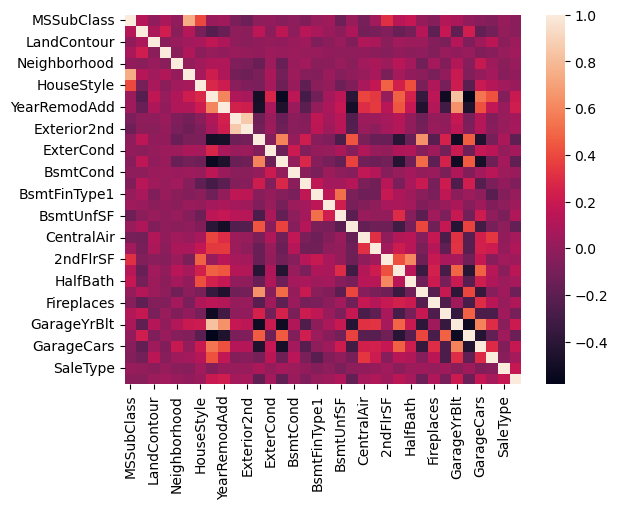

In [55]:
sns.heatmap(X_train.corr())